# IMDB Big Data Analysis 

Data-source: https://developer.imdb.com/non-commercial-datasets/

### Importing all necessary packages

In [1]:
!pip install pyspark

In [2]:
import pyspark

In [3]:
import warnings

In [4]:
from pyspark.sql import SparkSession

### Starting a Spark Session and Building Schema

In [5]:
spark = SparkSession.builder.appName('IMDB').getOrCreate()

In [6]:
spark

### Loading datasets

In [7]:
df_Rating = spark.read.csv('data-8.tsv', sep='\t',header=True, inferSchema=True)
df_episode = spark.read.csv('data-9.tsv', sep='\t',header=True, inferSchema=True)
df_Crew = spark.read.csv('data-10.tsv', sep='\t',header=True, inferSchema=True)
df_title_Basics= spark.read.csv('data-11.tsv', sep='\t',header=True, inferSchema=True)
df_name_Basics = spark.read.csv('data-12.tsv', sep='\t',header=True, inferSchema=True)
df_title_akas = spark.read.csv('data-13.tsv', sep='\t',header=True, inferSchema=True)
df_Principal= spark.read.csv('data-14.tsv',  sep='\t',header=True, inferSchema=True)

In [8]:
df_title_Basics = df_title_Basics.withColumnRenamed('titleId', 'tconst')

df_title_akas = df_title_akas.withColumnRenamed('titleId', 'tconst')

In [9]:
df_merged = df_Rating.join(df_title_Basics, on='tconst', how='inner') \
                   .join(df_title_akas, on='tconst', how='inner') \
                   .join(df_Crew, on='tconst', how='inner') \
                   .join(df_episode, on='tconst', how='left') \
                   .join(df_Principal, on='tconst', how='inner') \
                   .join(df_name_Basics, on='nconst', how='inner')

### Printing Individual Schemas for each dataframe

In [10]:
df_Rating.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



In [11]:
df_title_Basics.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)



In [12]:
df_Crew.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- writers: string (nullable = true)



In [13]:
df_title_akas.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- region: string (nullable = true)
 |-- language: string (nullable = true)
 |-- types: string (nullable = true)
 |-- attributes: string (nullable = true)
 |-- isOriginalTitle: string (nullable = true)



In [14]:
df_episode.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- parentTconst: string (nullable = true)
 |-- seasonNumber: string (nullable = true)
 |-- episodeNumber: string (nullable = true)



In [15]:
df_Principal.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)



In [16]:
df_name_Basics.printSchema()

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)



In [17]:
df_title_Basics = df_title_Basics.withColumnRenamed('titleId', 'tconst')

df_title_akas = df_title_akas.withColumnRenamed('titleId', 'tconst')

## Data Cleaning

In [18]:
from pyspark.sql.functions import col, isnan, when, count
df_list = [("df_Rating", df_Rating), ("df_title_Basics", df_title_Basics), ("df_Crew", df_Crew), ("df_title_akas", df_title_akas), ("df_episode", df_episode), ("df_Principal", df_Principal), ("df_name_Basics", df_name_Basics)]
for df_name, df in df_list:
    print(f"Null values in {df_name}:")
    df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Null values in df_Rating:
+------+-------------+--------+
|tconst|averageRating|numVotes|
+------+-------------+--------+
|     0|            0|       0|
+------+-------------+--------+

Null values in df_title_Basics:
+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|tconst|titleType|primaryTitle|originalTitle|isAdult|startYear|endYear|runtimeMinutes|genres|
+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|     0|        0|           0|            0|      1|        1|      1|             1|     1|
+------+---------+------------+-------------+-------+---------+-------+--------------+------+

Null values in df_Crew:
+------+---------+-------+
|tconst|directors|writers|
+------+---------+-------+
|     0|        0|      1|
+------+---------+-------+

Null values in df_title_akas:
+------+--------+-----+------+--------+-----+----------+---------------+
|tconst|ordering|title|region|language|types|at

In [19]:
df_list = [("df_Rating", df_Rating), ("df_title_Basics", df_title_Basics), ("df_Crew", df_Crew), ("df_title_akas", df_title_akas), ("df_episode", df_episode), ("df_Principal", df_Principal), ("df_name_Basics", df_name_Basics)]
for df_name, df in df_list:
    print(f"Removing null values from {df_name}...")
    df = df.na.drop(how='any')
    print(f"Done. {df.count()} rows remaining.\n")

Removing null values from df_Rating...
Done. 1311568 rows remaining.

Removing null values from df_title_Basics...
Done. 873378 rows remaining.

Removing null values from df_Crew...
Done. 2248022 rows remaining.

Removing null values from df_title_akas...
Done. 1206926 rows remaining.

Removing null values from df_episode...
Done. 3571870 rows remaining.

Removing null values from df_Principal...
Done. 1404553 rows remaining.

Removing null values from df_name_Basics...
Done. 858901 rows remaining.



### Scatter plot of Average rating Vs Num of Votes

In [20]:
avg_rat_df = df_title_Basics.join(df_Rating, on=['tconst'], how='inner')

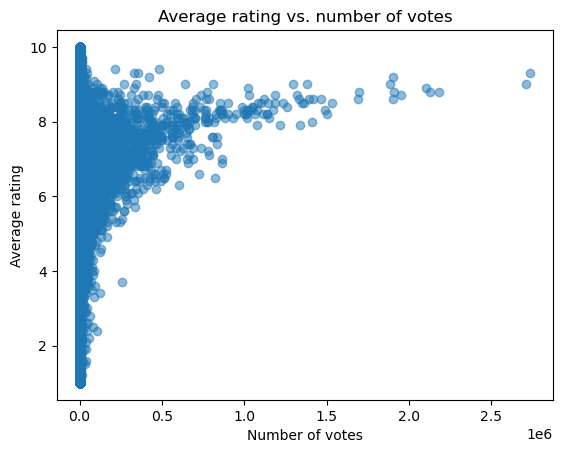

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
df = avg_rat_df.select('averageRating', 'numVotes')
pandas_df = df.toPandas()
plt.scatter(pandas_df['numVotes'], pandas_df['averageRating'], alpha=0.5)
plt.xlabel('Number of votes')
plt.ylabel('Average rating')
plt.title('Average rating vs. number of votes')
plt.show()



### Finding out the Frequency of Genres

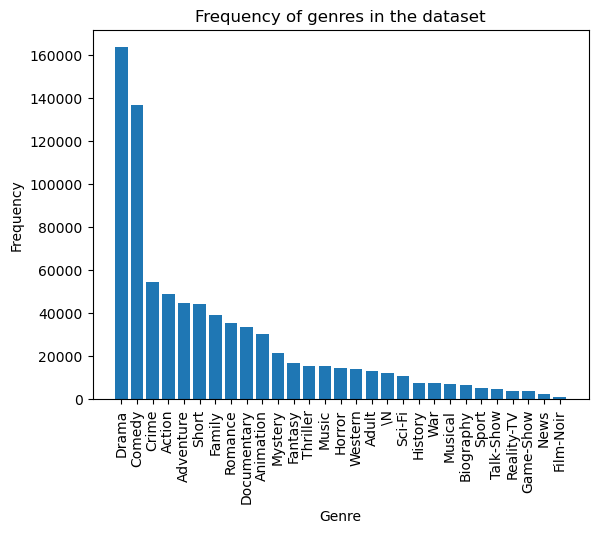

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import split, explode, col

freq_df= avg_rat_df.withColumn("genre", explode(split(col("genres"), ",")))
genre_counts = freq_df.groupBy("genre").count().orderBy("count", ascending=False)
pandas_df1 = genre_counts.toPandas()
plt.bar(pandas_df1["genre"], pandas_df1["count"])
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of genres in the dataset")
plt.xticks(rotation=90)
plt.show()



# Top 20 Genre by Average Rating

+--------------------+------------------+
|              genres|        avg_rating|
+--------------------+------------------+
|        Comedy,Sport|5.7550632911392405|
|Action,Adventure,...| 5.359574468085106|
|Documentary,Drama...| 7.425000000000001|
|Adult,Comedy,Musical|             4.975|
|Adventure,Family,...| 6.044848484848486|
|Comedy,Drama,Western| 6.307499999999999|
| Documentary,Western|             6.925|
|Film-Noir,Horror,...|               6.6|
|Action,Fantasy,Hi...|               6.0|
|  Fantasy,Horror,War|               6.0|
|Film-Noir,Mystery...| 7.040000000000001|
|   Documentary,Sport| 7.216326530612245|
|Action,Animation,...| 6.168421052631579|
|Comedy,Musical,Sc...| 5.446666666666666|
|Fantasy,Sci-Fi,Th...|              5.45|
|Drama,Film-Noir,H...|               6.0|
|       Comedy,Family| 6.029645093945721|
|Film-Noir,Romance...|               6.4|
|    Animation,Comedy| 6.215000000000001|
|       Action,Comedy| 5.680152671755725|
+--------------------+------------

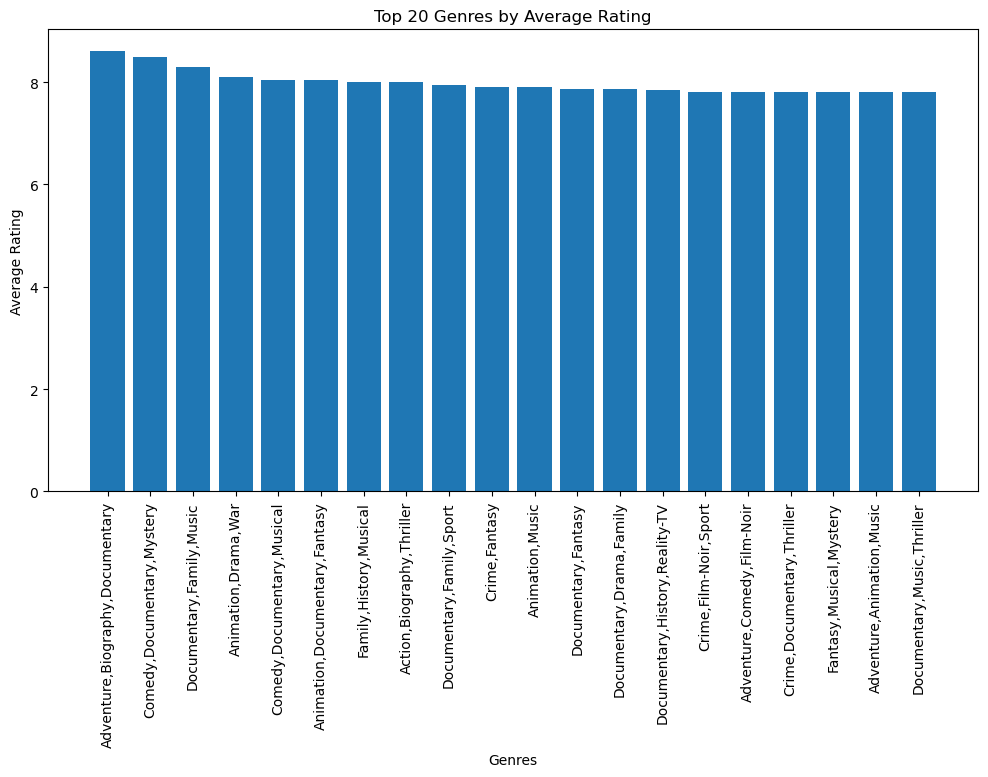

In [23]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
merged_df = df_title_Basics.join(df_Rating, df_title_Basics["tconst"] == df_Rating["tconst"], "inner")
filtered_df = merged_df.filter(F.col("titleType") == "movie")
avg_rating_by_genre = filtered_df.groupBy("genres").agg(F.avg("averageRating").alias("avg_rating"))
avg_rating_by_genre.show()
top_20_genres = avg_rating_by_genre.orderBy(F.desc("avg_rating")).limit(20)
pandas_df = top_20_genres.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(pandas_df["genres"], pandas_df["avg_rating"])
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Top 20 Genres by Average Rating")
plt.xticks(rotation=90)
plt.show()

## Top 10 Movies by Average Rating

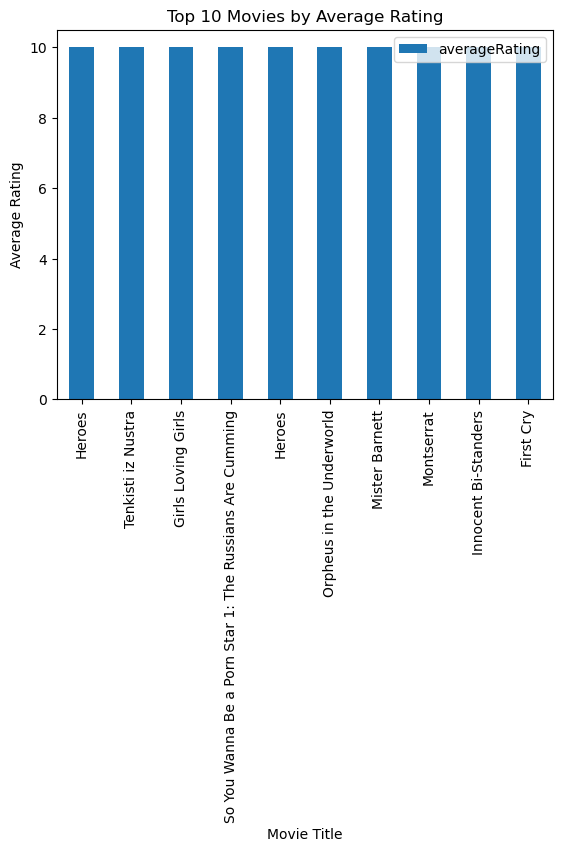

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc
top_10_movies = avg_rat_df.sort(desc("averageRating")).limit(10)
pandas_df = top_10_movies.toPandas()
ax = pandas_df.plot.bar(x="primaryTitle", y="averageRating", rot=90)
ax.set_xlabel("Movie Title")
ax.set_ylabel("Average Rating")
ax.set_title("Top 10 Movies by Average Rating")
plt.show()

### Distribution of ratings by genre

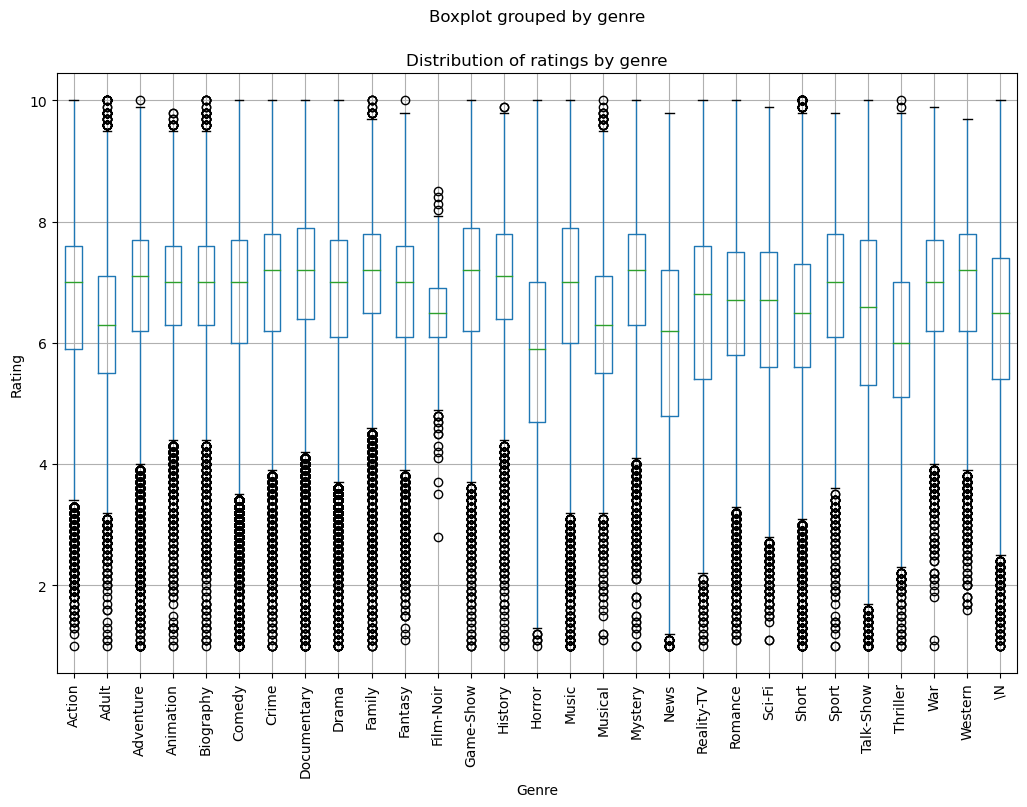

In [25]:
import matplotlib.pyplot as plt
ratings_by_genre = avg_rat_df.select('averageRating', 'genres')
ratings_by_genre = ratings_by_genre.withColumn('genre', explode(split(col('genres'), ',')))
pandas_df2 = ratings_by_genre.toPandas()
pandas_df2.boxplot(column=['averageRating'], by='genre', figsize=(12, 8))
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Distribution of ratings by genre')
plt.xticks(rotation=90)
plt.show()



### Average Rating VS last 20 years 

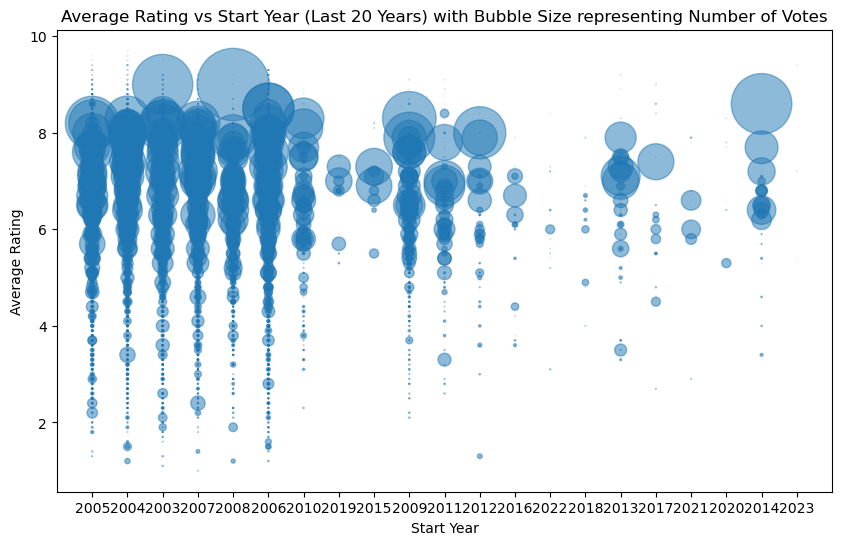

In [26]:

from datetime import datetime
merged_df = df_title_Basics.join(df_Rating, "tconst", "inner")
filtered_df = merged_df.filter(F.col("titleType") == "movie")
current_year = datetime.now().year
filtered_df = filtered_df.filter((current_year - F.col("startYear")) <= 20)
scatter_data = filtered_df.select("startYear", "averageRating", "numVotes")
pandas_df = scatter_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["startYear"], pandas_df["averageRating"], s=pandas_df["numVotes"]/1000, alpha=0.5)
plt.xlabel("Start Year")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Start Year (Last 20 Years) with Bubble Size representing Number of Votes")
plt.show()



## Average Rating and Number of Movies for Top 20 Movie Genres

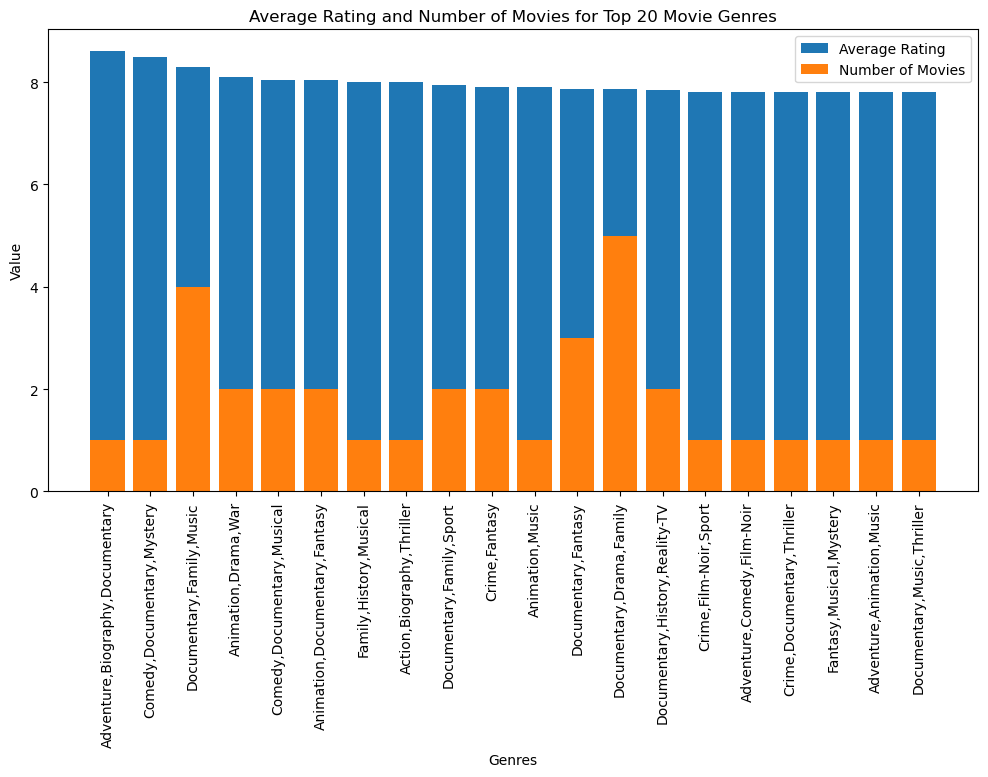

In [27]:
merged_df = df_title_Basics.join(df_Rating, "tconst", "inner")
filtered_df = merged_df.filter(F.col("titleType") == "movie")
genre_stats = filtered_df.groupBy("genres").agg(F.avg("averageRating").alias("avg_rating"), F.count("tconst").alias("num_movies"))
sorted_df = genre_stats.orderBy(F.desc("avg_rating"))
top_20_genres = sorted_df.limit(20)
pandas_df = top_20_genres.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(pandas_df["genres"], pandas_df["avg_rating"], label="Average Rating")
plt.bar(pandas_df["genres"], pandas_df["num_movies"], label="Number of Movies")
plt.xlabel("Genres")
plt.ylabel("Value")
plt.title("Average Rating and Number of Movies for Top 20 Movie Genres")
plt.xticks(rotation=90)
plt.legend()
plt.show()



## Number of Crew Members for Top 20 Primary Professions

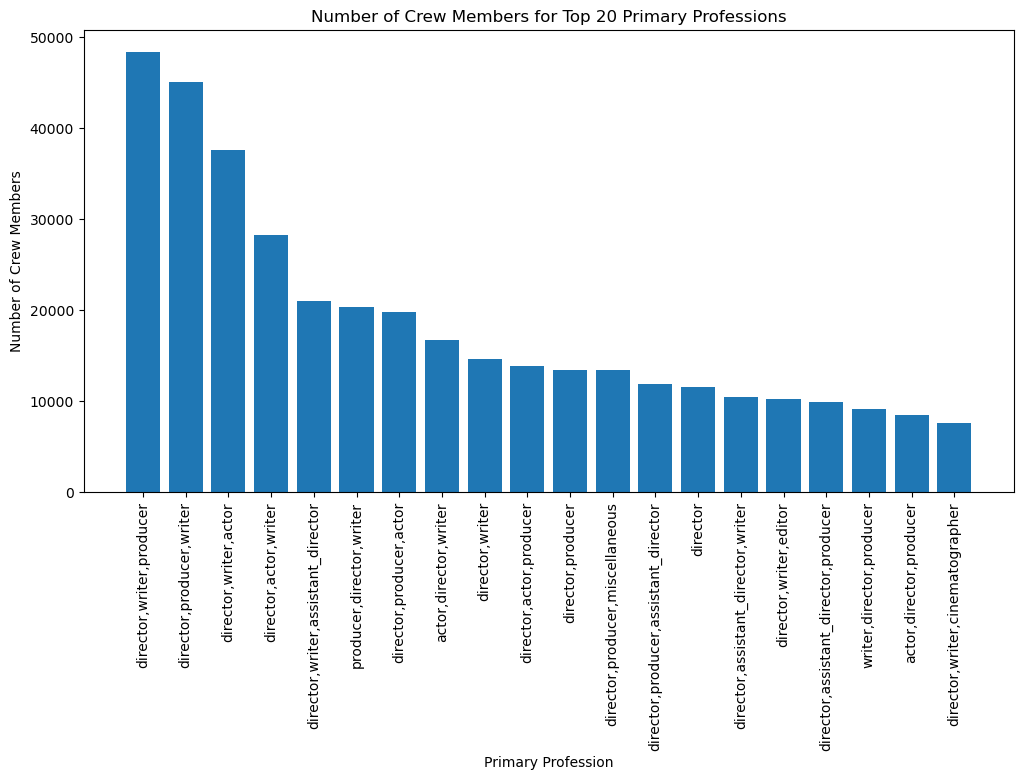

In [28]:
merged_df = df_Crew.join(df_name_Basics, df_Crew["directors"] == df_name_Basics["nconst"], "inner")
profession_counts = merged_df.groupBy("primaryProfession").count()
sorted_df = profession_counts.orderBy(F.desc("count"))
top_20_professions = sorted_df.limit(20)
pandas_df = top_20_professions.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(pandas_df["primaryProfession"], pandas_df["count"])
plt.xlabel("Primary Profession")
plt.ylabel("Number of Crew Members")
plt.title("Number of Crew Members for Top 20 Primary Professions")
plt.xticks(rotation=90)
plt.show()



## Top 10 Most Common Professions

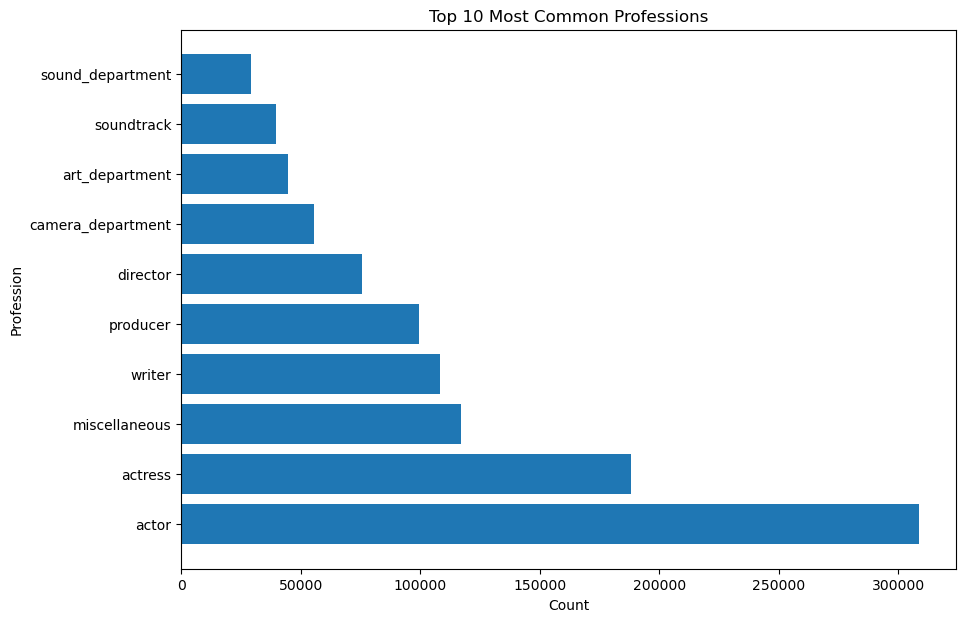

In [29]:
df_name_basics_filtered = df_name_Basics.filter(df_name_Basics.primaryProfession.isNotNull())
df_professions = df_name_basics_filtered.selectExpr("explode(split(primaryProfession, ',')) as profession")
profession_counts = df_professions.groupBy("profession").count().orderBy("count", ascending=False).limit(10).toPandas()
plt.figure(figsize=(10, 7))
plt.barh(profession_counts["profession"], profession_counts["count"])
plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Top 10 Most Common Professions')
plt.show()

### Number of titles per year

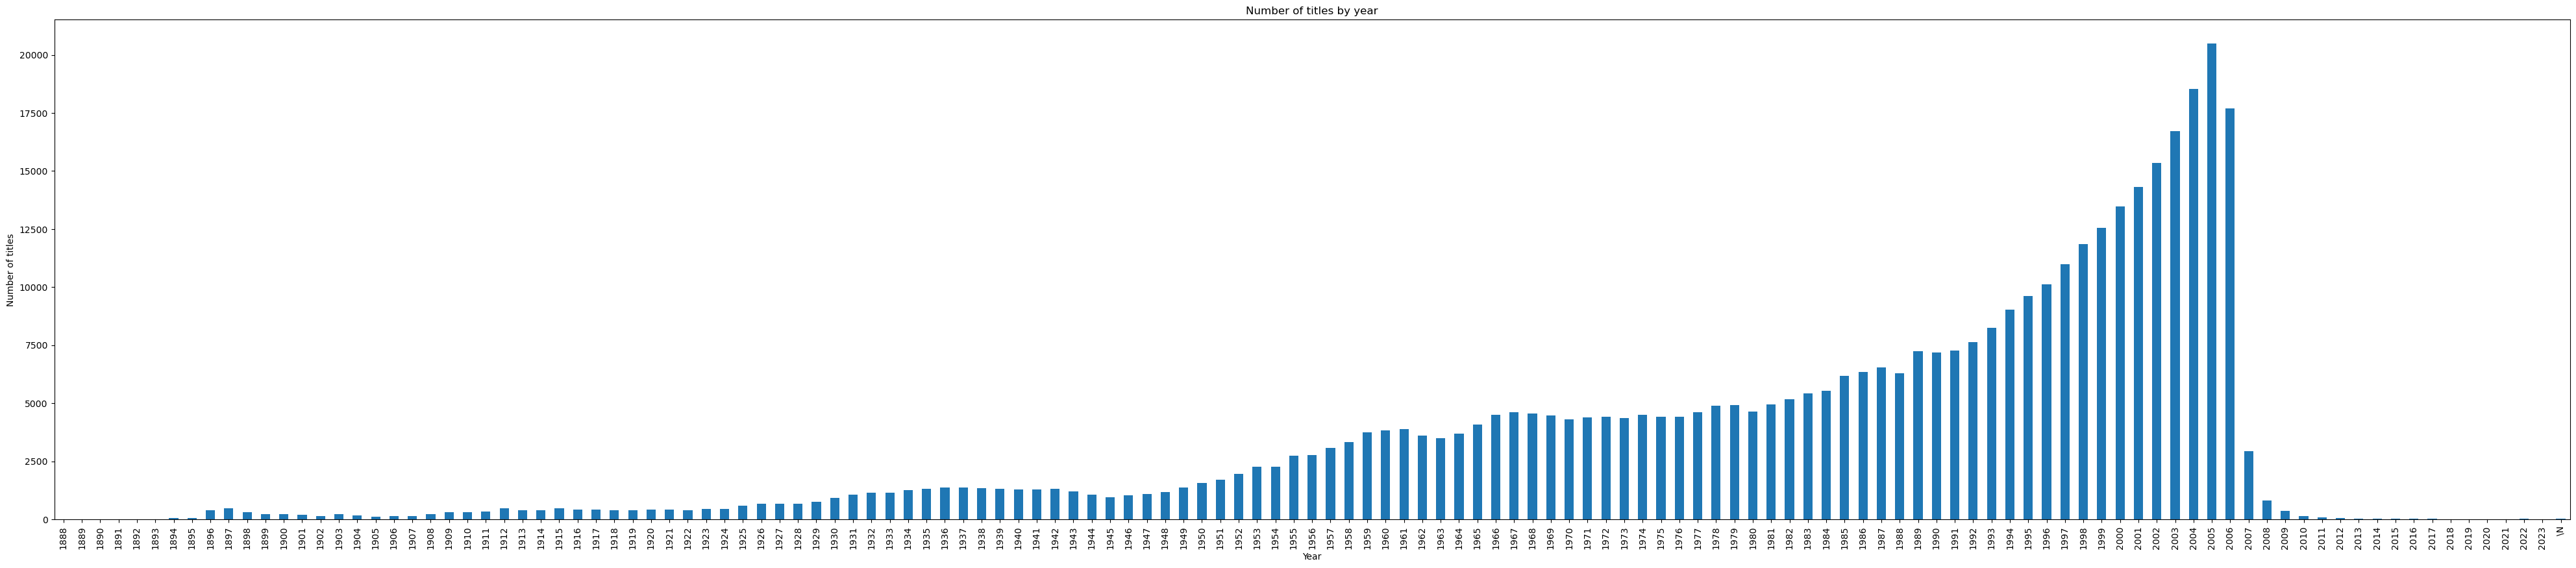

In [30]:
import matplotlib.pyplot as plt
start_years = avg_rat_df.select('startYear')
pandas_df3 = start_years.toPandas()
pandas_df3.groupby('startYear').size().plot(kind='bar', figsize=(50, 10))
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.title('Number of titles by year')
plt.xticks(rotation=90)
plt.show()



### Average Rating by title type

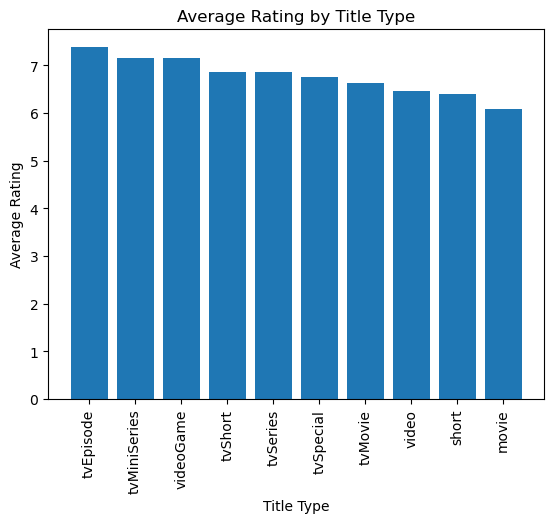

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import mean
titletype_rating = avg_rat_df.groupBy('titleType') \
    .agg(mean('averageRating').alias('avg_rating')) \
    .orderBy('avg_rating', ascending=False)
titletype_rating_pandas = titletype_rating.toPandas()
plt.bar(titletype_rating_pandas['titleType'], titletype_rating_pandas['avg_rating'])
plt.xlabel('Title Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Title Type')
plt.xticks(rotation=90)
plt.show()


### Plotting TVMA and Non-TVMA Category based on Average Ratings

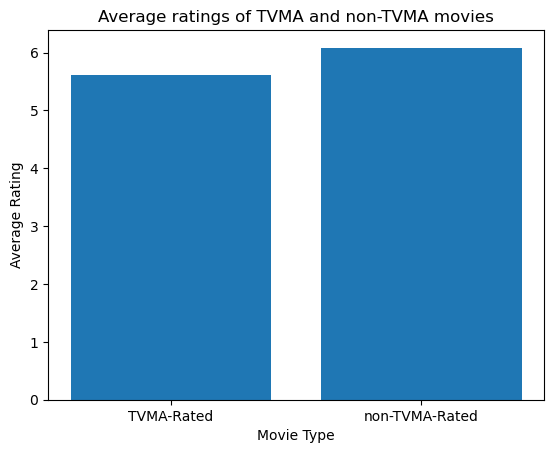

In [32]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
imdb_df = avg_rat_df.withColumn("startYear", avg_rat_df["startYear"].cast("integer"))
movies_df = imdb_df.filter(col('titleType') == 'movie').select('tconst', 'primaryTitle', 'startYear', 'isAdult', 'averageRating', 'numVotes')
movies_df = movies_df.withColumn("isAdult", movies_df["isAdult"].cast("integer"))
adult_movies = movies_df.filter(col('isAdult') == 1)
non_adult_movies = movies_df.filter(col('isAdult') == 0)
adult_avg_rating = adult_movies.agg(avg(col('averageRating'))).collect()[0][0]
non_adult_avg_rating = non_adult_movies.agg(avg(col('averageRating'))).collect()[0][0]

plt.bar(['TVMA-Rated', 'non-TVMA-Rated'], [adult_avg_rating, non_adult_avg_rating])
plt.title('Average ratings of TVMA and non-TVMA movies')
plt.xlabel('Movie Type')
plt.ylabel('Average Rating')
plt.show()



# Final Schema for merged dataframe

In [33]:
df_merged .printSchema()

root
 |-- nconst: string (nullable = true)
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- region: string (nullable = true)
 |-- language: string (nullable = true)
 |-- types: string (nullable = true)
 |-- attributes: string (nullable = true)
 |-- isOriginalTitle: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- writers: string (nullable = true)
 |-- parentTconst: string (nullable = true)
 |-- seasonNumber: string (nullable = true)
 |-- episodeNumber: string (nullable = true)
 |--

## Movie Genre Popularity Over the Years

In [34]:
from pyspark.sql.functions import year

df_genre_popularity = df_merged.filter(df_merged['titleType'] == 'movie') \
    .groupBy('genres', year('startYear').alias('year')) \
    .agg({'numVotes': 'sum'}) \
    .orderBy('year')

df_genre_popularity.show()


+--------------------+----+-------------+
|              genres|year|sum(numVotes)|
+--------------------+----+-------------+
|Drama,Musical,Rom...|null|       460566|
|               Drama|null|          154|
|             Romance|1894|         3060|
|Documentary,News,...|1897|         5628|
|     Biography,Drama|1903|        10098|
|                  \N|1905|          150|
|                  \N|1906|           38|
|Action,Adventure,...|1906|        57820|
|               Drama|1907|          564|
|                  \N|1908|          125|
|   Adventure,Fantasy|1908|         1224|
|               Drama|1908|          600|
|                  \N|1909|         1195|
|Biography,Drama,F...|1909|         3776|
|               Drama|1909|          525|
|           Drama,War|1909|          357|
|              Comedy|1909|           72|
|               Drama|1910|         1714|
|       Drama,History|1910|          641|
|     Adventure,Drama|1910|          252|
+--------------------+----+-------

## Top Movie Directors by Box Office Success"

In [35]:
from pyspark.sql.functions import sum, col
df_movies = df_merged.filter((col('titleType') == 'movie') & (col('numVotes').isNotNull()))
df_director_box_office = df_movies.groupby('directors') \
                                  .agg(sum('numVotes').alias('total_box_office'))
df_director_names = df_director_box_office.join(df_name_Basics, df_director_box_office.directors == df_name_Basics.nconst, 'left')
df_director_names = df_director_names.orderBy('total_box_office', ascending=False)
top_directors = df_director_names.select('primaryName', 'total_box_office')
top_directors.show(10, truncate=False)


+--------------------+----------------+
|primaryName         |total_box_office|
+--------------------+----------------+
|Steven Spielberg    |6025091918      |
|Francis Ford Coppola|4056835266      |
|Peter Jackson       |3854382130      |
|Robert Zemeckis     |3822785685      |
|James Cameron       |3601055169      |
|George Lucas        |3381170822      |
|Stanley Kubrick     |3212387840      |
|Frank Darabont      |3069088340      |
|David Fincher       |2996747960      |
|Martin Scorsese     |2418768959      |
+--------------------+----------------+
only showing top 10 rows



## Popularity Trend of Actors/Actresses Over the Years

In [36]:
from pyspark.sql.functions import sum, col
df_popularity = df_merged.filter((col('primaryProfession').contains('actor')) |
                                 (col('primaryProfession').contains('actress'))) \
                         .filter(col('numVotes').isNotNull())
df_actor_popularity = df_popularity.groupby(['nconst', 'startYear']) \
                                   .agg(sum('numVotes').alias('total_votes'))
df_actor_names = df_actor_popularity.join(df_name_Basics, df_actor_popularity.nconst == df_name_Basics.nconst, 'left')
df_actor_names = df_actor_names.orderBy('startYear', ascending=True)
actor_popularity = df_actor_names.select('primaryName', 'startYear', 'total_votes')
actor_popularity.show(10, truncate=False)


+------------------+---------+-----------+
|primaryName       |startYear|total_votes|
+------------------+---------+-----------+
|John Ott          |1893     |31368      |
|Charles Kayser    |1893     |31368      |
|William Courtenay |1894     |1020       |
|Blanche Bayliss   |1894     |1020       |
|James J. Corbett  |1894     |7362       |
|Peter Courtney    |1894     |7362       |
|Annabelle Moore   |1895     |22990      |
|Benoît Duval      |1895     |132120     |
|Auguste Lumière   |1895     |116650     |
|Eugen Skladanowsky|1895     |804        |
+------------------+---------+-----------+
only showing top 10 rows



## Top 10 Most Popular Actors/Actresses in the Last 10 Years".

In [37]:
num_years = 10
df_popularity = df_merged.filter((col('primaryProfession').contains('actor')) | 
                                  (col('primaryProfession').contains('actress'))) \
                         .filter(col('numVotes').isNotNull()) \
                         .filter(col('startYear') != '\\N')
max_year = str(int(df_popularity.select('startYear').rdd.max()[0]) - num_years)
df_actor_popularity = df_popularity.filter(col('startYear') >= max_year)
df_actor_popularity = df_actor_popularity.groupby(['nconst', 'startYear']) \
                                   .agg(sum('numVotes').alias('total_votes'))
df_actor_popularity = df_actor_popularity.orderBy('total_votes', ascending=False).head(10)

In [38]:
for i in range(len(df_actor_popularity)):
    nconst = df_actor_popularity[i][0]
    start_year = df_actor_popularity[i][1]
    total_votes = df_actor_popularity[i][2]
    actor_name = df_merged.filter(col('nconst') == nconst).select('primaryName').collect()[0][0]
    print(f"{i+1}. {actor_name}: {start_year} - {total_votes} total votes")

1. Oja Kodar: 2018 - 184272 total votes
2. Peter Bogdanovich: 2018 - 184272 total votes
3. Susan Strasberg: 2018 - 184272 total votes
4. John Huston: 2018 - 184272 total votes
5. Orson Welles: 2018 - 184272 total votes
6. Patricia Rivadeneira: 2017 - 2752 total votes
7. Luis Alarcón: 2017 - 2752 total votes
8. Francisco Reyes: 2017 - 2752 total votes
9. Luis Alarcón: 2020 - 1730 total votes
10. Shenda Román: 2020 - 1730 total votes


## Performance comparison between original and remake movies

In [39]:
from pyspark.sql.functions import col
df_movies = df_merged.filter((col('titleType') == 'movie') & (col('numVotes').isNotNull()) & (col('averageRating').isNotNull()))
df_remakes = df_movies.filter(col('originalTitle').isNotNull()).filter(col('primaryTitle') != col('originalTitle'))
df_originals = df_movies.alias('a').join(df_remakes.alias('b'), 
                                          (col('a.originalTitle') == col('b.originalTitle')) & 
                                          (col('a.startYear') == col('b.startYear')), how='inner')
df_originals_avg = df_originals.groupBy('a.originalTitle').agg({'a.averageRating': 'mean', 'a.numVotes': 'sum'}) \
                               .withColumnRenamed('avg(averageRating)', 'originalAvgRating') \
                               .withColumnRenamed('sum(numVotes)', 'originalTotalBoxOffice')
df_remakes_avg = df_remakes.groupBy('originalTitle').agg({'averageRating': 'mean', 'numVotes': 'sum'}) \
                           .withColumnRenamed('avg(averageRating)', 'remakeAvgRating') \
                           .withColumnRenamed('sum(numVotes)', 'remakeTotalBoxOffice')

In [40]:
df_comparison = df_originals_avg.join(df_remakes_avg, 'originalTitle', how='inner')
df_comparison = df_comparison.select('originalTitle', 'originalAvgRating', 'remakeAvgRating', 'originalTotalBoxOffice', 'remakeTotalBoxOffice')
df_comparison = df_comparison.withColumn('ratingDifference', col('remakeAvgRating') - col('originalAvgRating'))
df_comparison = df_comparison.withColumn('boxOfficeDifference', col('remakeTotalBoxOffice') - col('originalTotalBoxOffice'))

In [41]:
print("Performance comparison between original and remake movies:")
df_comparison.show()

Performance comparison between original and remake movies:
+--------------------+------------------+-----------------+----------------------+--------------------+--------------------+-------------------+
|       originalTitle| originalAvgRating|  remakeAvgRating|originalTotalBoxOffice|remakeTotalBoxOffice|    ratingDifference|boxOfficeDifference|
+--------------------+------------------+-----------------+----------------------+--------------------+--------------------+-------------------+
|        1/3 qing ren| 5.300000000000118|              5.3|                 58320|                1620|-1.18127729820116...|             -56700|
|   Achtung! Banditi!| 6.399999999996605|6.399999999999998|               8930100|               52530|3.392841563254478...|           -8877570|
|           Besökarna|5.7000000000007445|5.699999999999996|              63955700|              376210|-7.48734407807205...|          -63579490|
|Ceremonia sangrienta| 5.799999999994754|5.800000000000005|            

## Bar chart comparing the average ratings of original and remake movies

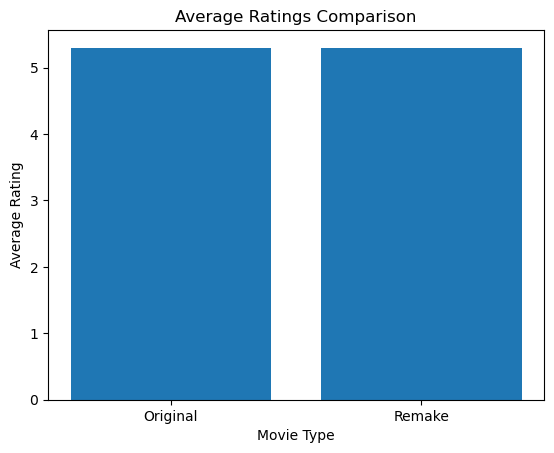

In [42]:
import matplotlib.pyplot as plt
plt.bar(['Original', 'Remake'], [df_comparison.select('originalAvgRating').collect()[0][0], df_comparison.select('remakeAvgRating').collect()[0][0]])
plt.title('Average Ratings Comparison')
plt.xlabel('Movie Type')
plt.ylabel('Average Rating')
plt.show()

## Create a scatter plot comparing the total box office earnings of original and remake movies

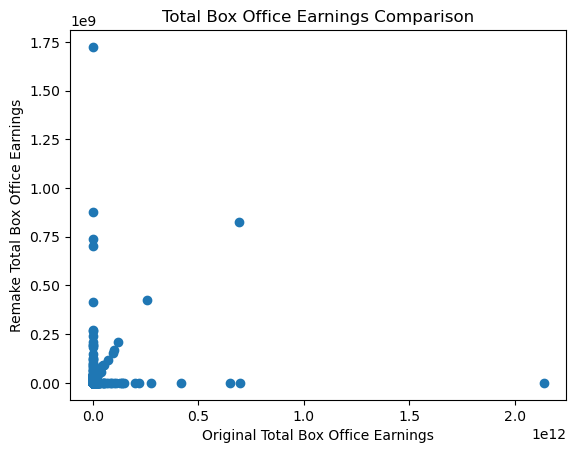

In [43]:
plt.scatter(df_comparison.select('originalTotalBoxOffice').collect(), df_comparison.select('remakeTotalBoxOffice').collect())
plt.title('Total Box Office Earnings Comparison')
plt.xlabel('Original Total Box Office Earnings')
plt.ylabel('Remake Total Box Office Earnings')
plt.show()

## Calculating the co-relation between Critcs and Audience rating

In [44]:
from pyspark.sql.functions import corr
df_ratings = df_merged.select('averageRating', 'numVotes')
corr = df_ratings.corr('averageRating', 'numVotes')

print("Correlation between critical and audience ratings:", corr)


Correlation between critical and audience ratings: 0.231256796768513


The value of 0.231256796768513 indicates a positive correlation between critical ratings and audience ratings, but the strength of the correlation is relatively weak. A correlation coefficient can range from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation. In this case, the positive value indicates that as critical ratings increase, audience ratings tend to increase as well, but the magnitude of the increase is not very strong.

## Analysis of Movie Types: Sequels, Franchises, and Standalone Films

In [45]:
from pyspark.sql.functions import regexp_extract, col, when

# Define regular expressions to identify sequels and franchises
sequel_regex = r'(?i)^.*\b\d\b.*$'  # Matches titles that contain a single digit
franchise_regex = r'(?i)^.*\b(\d|part)\b.*$'  # Matches titles that contain a digit or the word "part"
df_merged = df_merged.withColumn(
    'movie_type',
    when(
        regexp_extract(col('primaryTitle'), sequel_regex, 0) != '',
        'sequel'
    ).when(
        regexp_extract(col('primaryTitle'), franchise_regex, 0) != '',
        'franchise'
    ).otherwise('standalone')
)
df_performance = df_merged.groupby('movie_type').agg(
    {'averageRating': 'mean', 'numVotes': 'sum'}
)
df_performance.show()


+----------+------------------+-------------+
|movie_type|avg(averageRating)|sum(numVotes)|
+----------+------------------+-------------+
|    sequel|5.7822785297126025|   4045143880|
| franchise| 6.573859630381321|   2785574996|
|standalone|  6.28096129788794| 167514261808|
+----------+------------------+-------------+



## Finding Highest Rated Movies by Category: Sequels, Franchises, and Standalone Films

In [46]:
from pyspark.sql.functions import max
sequel_df = df_merged.filter(df_merged.movie_type == 'sequel')
franchise_df = df_merged.filter(df_merged.movie_type == 'franchise')
standalone_df = df_merged.filter(df_merged.movie_type == 'standalone')
sequel_max_rating = sequel_df.filter(sequel_df.averageRating == sequel_df.select(max('averageRating')).collect()[0][0]).select('primaryTitle', 'averageRating').collect()[0]
franchise_max_rating = franchise_df.filter(franchise_df.averageRating == franchise_df.select(max('averageRating')).collect()[0][0]).select('primaryTitle', 'averageRating').collect()[0]
standalone_max_rating = standalone_df.filter(standalone_df.averageRating == standalone_df.select(max('averageRating')).collect()[0][0]).select('primaryTitle', 'averageRating').collect()[0]
print(f"Highest rated sequel: {sequel_max_rating[0]} with a rating of {sequel_max_rating[1]}")
print(f"Highest rated franchise: {franchise_max_rating[0]} with a rating of {franchise_max_rating[1]}")
print(f"Highest rated standalone movie: {standalone_max_rating[0]} with a rating of {standalone_max_rating[1]}")


Highest rated sequel: Renegades 2 with a rating of 10.0
Highest rated franchise: The Godfather Part II with a rating of 9.0
Highest rated standalone movie: Girls Loving Girls with a rating of 10.0


# Analysis using Apache Hive

## Genre Popularity Trend Over the Years (2012 and onwards)

In [47]:
from pyspark.sql.functions import year
from pyspark.sql import HiveContext

hive_context = HiveContext(spark.sparkContext)

df_merged.registerTempTable("merged_table")

genre_popularity_query = """
SELECT startYear, genres, COUNT(*) as num_movies
FROM merged_table
WHERE startYear IS NOT NULL AND startYear >= '2012'
GROUP BY startYear, genres
ORDER BY startYear DESC, num_movies DESC
"""

genre_popularity_df = hive_context.sql(genre_popularity_query)

genre_popularity_df.show(100)


/usr/local/spark/python/pyspark/sql/context.py:718: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  warnings.warn(
/usr/local/spark/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/usr/local/spark/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+---------+--------------------+----------+
|startYear|              genres|num_movies|
+---------+--------------------+----------+
|       \N|Drama,Musical,Rom...|        81|
|       \N|               Drama|        14|
|       \N|     Animation,Short|        12|
|       \N|                  \N|        10|
|     2023|         Documentary|        28|
|     2023|                  \N|         8|
|     2023|Animation,History...|         6|
|     2023|               Short|         5|
|     2022|       Action,Comedy|        28|
|     2022|               Drama|        24|
|     2022|       Music,Musical|         9|
|     2022|               Short|         8|
|     2022|                  \N|         4|
|     2021|         Documentary|        18|
|     2021|               Short|        10|
|     2020|               Drama|        70|
|     2019|             Fantasy|        36|
|     2019|Biography,Documen...|        18|
|     2019|               Short|        15|
|     2019|     Animation,Short|

## Number of Movie and TV Show Releases by Year

In [48]:
from pyspark.sql.functions import count
from pyspark.sql.functions import desc
df_merged.createOrReplaceTempView("merged_table")

num_releases_query = """
SELECT startYear, COUNT(*) AS num_releases
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries') AND startYear IS NOT NULL
GROUP BY startYear
ORDER BY startYear
"""
num_releases_df = spark.sql(num_releases_query)
num_releases_df.show()


+---------+------------+
|startYear|num_releases|
+---------+------------+
|     1894|          15|
|     1897|          12|
|     1903|          17|
|     1905|          10|
|     1906|          72|
|     1907|          25|
|     1908|          47|
|     1909|         175|
|     1910|         209|
|     1911|         923|
|     1912|        1039|
|     1913|        2900|
|     1914|        6101|
|     1915|        7029|
|     1916|        8927|
|     1917|        9075|
|     1918|       10154|
|     1919|       13745|
|     1920|       14415|
|     1921|       15199|
+---------+------------+
only showing top 20 rows



## Number of movies/shows by language

In [49]:
num_titles_by_language_query = """
SELECT language, COUNT(*) AS num_titles
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries') AND language IS NOT NULL
GROUP BY language
ORDER BY num_titles DESC
"""
num_titles_by_language_df = spark.sql(num_titles_by_language_query)
num_titles_by_language_df.show()


+--------+----------+
|language|num_titles|
+--------+----------+
|      \N|   6858184|
|      en|    601422|
|      ja|    193865|
|      fr|    191046|
|      ru|    177071|
|      tr|    111834|
|      bg|     88019|
|     qbn|     47600|
|      sr|     42352|
|      sv|     29979|
|      hi|     29334|
|     cmn|     28147|
|      ca|     15611|
|     yue|     15318|
|      he|     11707|
|      fa|     10692|
|      hr|      9983|
|      cs|      7417|
|      sl|      6083|
|      nl|      4736|
+--------+----------+
only showing top 20 rows



## Number of movies/shows by director

In [50]:
num_titles_by_director_query = """
SELECT directors, COUNT(*) AS num_titles
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries') AND directors IS NOT NULL
GROUP BY directors
ORDER BY num_titles DESC
"""
num_titles_by_director_df = spark.sql(num_titles_by_director_query)
num_titles_by_director_df.show()

+---------+----------+
|directors|num_titles|
+---------+----------+
|nm0000033|     22445|
|nm0002031|     22186|
|nm0000406|     21145|
|nm0909825|     16642|
|nm0368871|     14925|
|nm0861703|     14656|
|nm0001238|     13523|
|nm0000485|     13065|
|nm0782947|     12944|
|nm0000005|     12726|
|nm0235066|     12694|
|nm0001486|     12690|
|nm0001379|     12524|
|nm0851537|     12383|
|nm0496746|     12378|
|       \N|     12198|
|nm0792450|     11857|
|nm0045800|     11817|
|nm0001175|     11786|
|nm0002030|     11726|
+---------+----------+
only showing top 20 rows



## Top 25 Movies with Highest Average Ratings

In [51]:
df_merged.createOrReplaceTempView("merged_table")

top_rated_movies_query = """
SELECT primaryTitle, AVG(averageRating) AS avg_rating
FROM merged_table
WHERE titleType = 'movie' AND averageRating IS NOT NULL
GROUP BY primaryTitle
ORDER BY avg_rating DESC
LIMIT 25
"""
top_rated_movies = spark.sql(top_rated_movies_query)
top_rated_movies.show()

# Print average rating
print("Average rating of top-rated movies:", top_rated_movies.selectExpr("AVG(avg_rating)").collect()[0][0])


+--------------------+-----------------+
|        primaryTitle|       avg_rating|
+--------------------+-----------------+
|  Girls Loving Girls|             10.0|
|       All I Know Is|              9.8|
|    Nicole's Revenge|              9.7|
|Seinerzeit zu mei...|              9.7|
|    Pepper's Pow Wow|              9.6|
|Wiping the Tears ...|              9.5|
|     Dresden Diary 3|              9.5|
|Nikki Dial's Secr...|              9.5|
|     Maria, die Magd|9.400000000000002|
|       Born of Water|9.400000000000002|
|Christy Canyon X-...|              9.4|
|Christy Canyon X-...|              9.4|
|       Mahatma Phule|              9.4|
|           Nine Ball|              9.4|
|      General Motors|              9.4|
|       Nonki Yokocho|              9.4|
|The Shawshank Red...|9.300000000000018|
|Ein Mädchen mit P...|9.300000000000002|
|    Steeper & Deeper|              9.3|
|Before Your Eyes:...|              9.3|
+--------------------+-----------------+
only showing top

## Top 20 TV Series with Highest Average Ratings

In [52]:
df_merged.createOrReplaceTempView("merged_table")

top_rated_tv_query = """
SELECT primaryTitle, AVG(averageRating) AS avg_rating, COUNT(*) AS count
FROM merged_table
WHERE titleType = 'tvSeries' AND numVotes IS NOT NULL
GROUP BY primaryTitle
ORDER BY avg_rating DESC
LIMIT 20
"""

top_rated_tv = spark.sql(top_rated_tv_query)
top_rated_tv.show()

print("Average rating of top-rated TV series:", top_rated_tv.selectExpr("AVG(avg_rating)").collect()[0][0])


+--------------------+-----------------+-----+
|        primaryTitle|       avg_rating|count|
+--------------------+-----------------+-----+
|Six Centuries of ...|              9.5|   20|
|           The Liars|              9.5|   24|
|    Meeting of Minds|              9.4|   27|
|               Della|9.399999999999999|   18|
|             Matador|9.300000000000006|  140|
|           Kii Hantâ|9.300000000000002|   45|
|       Monstervision|              9.3|   40|
|       Black Omnibus|              9.3|   18|
|The World of Tim ...|              9.3|   20|
|               Traps|9.299999999999999|   30|
|       Night Network|9.299999999999999|   18|
|        The Sopranos|9.200000000000022|  550|
|    The World at War|9.200000000000019|  430|
|   Eyes on the Prize|9.200000000000001|   28|
|     Bei uns zu Haus|9.200000000000001|   18|
|Charlie Wild, Pri...|9.200000000000001|   18|
|Saturday Night at...|              9.2|    8|
|     Byomkesh Bakshi|              9.2|   12|
|The World of

## Count of Movies by Decade

In [53]:

df_merged.createOrReplaceTempView("merged_table")

movies_by_decade_query = """
SELECT SUBSTR(startYear, 1, 3) || '0s' AS decade, COUNT(*) AS count
FROM merged_table
WHERE titleType = 'movie' AND startYear IS NOT NULL
GROUP BY SUBSTR(startYear, 1, 3)
ORDER BY decade
"""
movies_by_decade = spark.sql(movies_by_decade_query)
movies_by_decade.show()


+------+-------+
|decade|  count|
+------+-------+
| 1890s|     27|
| 1900s|    346|
| 1910s|  60102|
| 1920s| 248896|
| 1930s| 684053|
| 1940s| 709749|
| 1950s|1043039|
| 1960s|1118823|
| 1970s|1235621|
| 1980s|1355683|
| 1990s|1526253|
| 2000s|  59714|
| 2010s|    476|
| 2020s|    180|
|  \N0s|     95|
+------+-------+



## Count of Movies and TV Series by Region

In [54]:

df_merged.createOrReplaceTempView("merged_table")
movie_tv_count_query = """
SELECT region, titleType, COUNT(*) AS count
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries') AND region IS NOT NULL
GROUP BY region, titleType
ORDER BY region
"""

movie_tv_count = spark.sql(movie_tv_count_query)
movie_tv_count.show()


+------+---------+------+
|region|titleType| count|
+------+---------+------+
|    AE| tvSeries|  2748|
|    AE|    movie| 10606|
|    AF|    movie|    55|
|    AL| tvSeries|    66|
|    AL|    movie|  1195|
|    AM|    movie|   255|
|    AO|    movie|    17|
|    AR|    movie|128469|
|    AR| tvSeries|  4174|
|    AT| tvSeries|   706|
|    AT|    movie| 83291|
|    AU| tvSeries| 11355|
|    AU|    movie|110656|
|    AW|    movie|     9|
|    AZ|    movie|   411|
|    BA| tvSeries|    65|
|    BA|    movie|  1130|
|    BD|    movie|   579|
|    BD| tvSeries|    44|
|    BE| tvSeries|  1022|
+------+---------+------+
only showing top 20 rows



In [55]:
from pyspark.sql.functions import when, col, lit

# Add a new column to indicate TV shows or movies
df_merged = df_merged.withColumn("media_type", when(col("titleType") == "tvSeries", lit("TV show")).otherwise(lit("Movie")))

# Group by region and media type and sum up the counts
grouped_by_region = df_merged.groupBy("region", "media_type").count()

# Pivot the table to show TV show and movie counts side-by-side
pivoted = grouped_by_region.groupBy("region").pivot("media_type").sum("count")

# Calculate the total count for each region
total_count = pivoted.withColumn("total", col("Movie") + col("TV show")).select("region", "total")

# Sort by the total count and print the top 10 regions
top_regions = total_count.orderBy(col("total").desc()).limit(10)
top_regions.show()


+------+-------+
|region|  total|
+------+-------+
|    \N|1116992|
|    US| 881450|
|    GB| 436151|
|    FR| 396499|
|    ES| 395511|
|    BR| 380436|
|    IT| 350160|
|    GR| 346376|
|    CA| 332282|
|    FI| 325971|
+------+-------+



## Count of Movies and TV Shows by Job Role

In [56]:

df_merged.createOrReplaceTempView("merged_table")

director_query = """
SELECT job, COUNT(*) as count
FROM merged_table
WHERE media_type IN ('Movie', 'TV show')
GROUP BY job
ORDER BY count DESC
LIMIT 10
"""
director_count = spark.sql(director_query)
director_count.show()


+--------------------+-------+
|                 job|  count|
+--------------------+-------+
|                  \N|7210397|
|            producer| 716669|
|          screenplay| 351122|
|director of photo...| 198540|
|               story| 183954|
|          written by| 135733|
|              writer|  74468|
|               novel|  71956|
|         screen play|  43816|
|          adaptation|  40844|
+--------------------+-------+



## Top Crew Members with Most Titles in Movies and TV Series

In [57]:

df_merged.createOrReplaceTempView("merged_table")
crew_query = """
SELECT nconst, primaryName, COUNT(DISTINCT tconst) as num_titles
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries') AND job != ''
GROUP BY nconst, primaryName
ORDER BY num_titles DESC
LIMIT 10
"""

top_crew_members = spark.sql(crew_query)
top_crew_members.show()



+---------+-----------------+----------+
|   nconst|      primaryName|num_titles|
+---------+-----------------+----------+
|nm0627060|    Harry Neumann|       262|
|nm0001553|  Ennio Morricone|       238|
|nm0588316|    Ernest Miller|       217|
|nm0627864|     Sam Newfield|       202|
|nm0441947|      Sam Katzman|       192|
|nm0156963|Hsing-Lung Chiang|       185|
|nm0105899|    Artur Brauner|       184|
|nm0006275|     Paul Sawtell|       179|
|nm0000465|       Ron Jeremy|       177|
|nm0845290|      T.J. Särkkä|       174|
+---------+-----------------+----------+



## Average Rating by Runtime Bucket in Movies and TV Series

In [58]:

df_merged.createOrReplaceTempView("merged_table")

rating_query = """
SELECT ROUND(runtimeMinutes / 10) * 10 AS runtime_bucket, AVG(averageRating) AS avg_rating
FROM merged_table
WHERE titleType IN ('movie', 'tvSeries')
GROUP BY runtime_bucket
ORDER BY runtime_bucket
"""

rating_by_runtime = spark.sql(rating_query)
rating_by_runtime.show()


+--------------+------------------+
|runtime_bucket|        avg_rating|
+--------------+------------------+
|          null|6.2503788461539305|
|           0.0| 7.557352941176467|
|          10.0| 7.233922383922398|
|          20.0| 7.485625947108558|
|          30.0| 7.161048172543064|
|          40.0| 7.184508600744431|
|          50.0| 6.601158311510927|
|          60.0| 6.307350638164518|
|          70.0| 6.043955837672797|
|          80.0|  6.01889605339931|
|          90.0| 5.909627397390164|
|         100.0| 6.177719308958317|
|         110.0| 6.496968267503368|
|         120.0| 6.766118927839834|
|         130.0| 6.950740143799192|
|         140.0| 7.097615956487228|
|         150.0| 7.154792294856221|
|         160.0| 7.129961618078396|
|         170.0| 7.181163752164839|
|         180.0|7.4431808307989655|
+--------------+------------------+
only showing top 20 rows



## Correlation Between Runtime and Average Rating in Movies and TV Series

In [59]:
from pyspark.sql.functions import col
df_filtered = df_merged.filter(col("runtimeMinutes").isNotNull() & col("averageRating").isNotNull())
df_filtered = df_filtered.withColumn("runtimeMinutes", df_filtered["runtimeMinutes"].cast("double"))
df_filtered = df_filtered.withColumn("averageRating", df_filtered["averageRating"].cast("double"))
correlation = df_filtered.corr("runtimeMinutes", "averageRating")
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.12049038315298953


# Machine Learning Modelling

### Predict the average rating of movies based on various features such as genres, startYear, and numVotes.

#### Approach: Linear Regression

# Importing packages

In [60]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Feature Selection

In [61]:
selected_features = ["genres", "startYear", "numVotes"]
target_column = "averageRating"
df_selected = df_merged.select(selected_features + [target_column]).na.drop()

# Linear regression Training and Testing

In [62]:
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(df_selected) for col in ["genres", "startYear"]]
for indexer in indexers:
    df_selected = indexer.transform(df_selected)
assembler = VectorAssembler(inputCols=["genres_index", "startYear_index", "numVotes"], outputCol="features")
df_assembled = assembler.transform(df_selected).select("features", target_column)

# Split the data into training and testing sets
(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Create a Linear Regression model
lr = LinearRegression(labelCol=target_column)

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol=target_column, metricName="rmse")
rmse = evaluator.evaluate(predictions)

In [63]:
print("Root Mean Squared Error (RMSE):", rmse)
print("Model Coefficients:", lr_model.coefficients)

Root Mean Squared Error (RMSE): 1.0410740437429606
Model Coefficients: [-0.00012453945920703948,0.004868608367347362,2.6756119689425546e-06]


* A lower RMSE indicates better predictive performance, so a value of 1.04 suggests that the model's predictions are relatively close to the actual ratings.
* The coefficients show that "genres" have the most significant positive effect, while "startYear" has a slight negative effect, and "numVotes" has a very small positive effect in predicting the rating.

## References

* https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html

* https://www.sobyte.net/post/2021-10/jpuyter-pyspark-hive/

* https://spark.apache.org/docs/latest/sql-data-sources-hive-tables.html

* https://spark.apache.org/docs/latest/api/python/